# Exploratory Data Analysis

### Overview

In this notebook we are going to visualize various plots using Python libraries such as matplotlib and seaborn. Our main aim in this section is to understand our data in detail using different plots; visualization makes a big difference in understanding our data. If we just stare at the numbers and data that are present in our dataset to understand what is happening, then that is going to take a lot of time and effort. That is why we use visualization; when we visually plot our data, it becomes more clear what our data is saying and how the different attributes correlate with our target variable, which is the potability of water.

Lets first load our clean data and check its statistical behaviour

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')

In [26]:
df = pd.read_csv("Clean_data.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [27]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

The `describe()` function in pandas is one of the most used and the most important functions out there; it gives us a lot of information in terms of data and values. It helps us understand the distribution, spread, and potential outliers that are present in our dataset.

1. Distribution:

The mean value that is present for each and every attribute represents the central tendency of that feature. If the central tendency or the mean is much higher than the median (50% value) of the feature, then that suggests the data might be skewed. The min and max values of every feature tell us about the maximum and the minimum values that are present in the feature; they give us an idea about the spread of the data. These different statistics (`min`, `max`, `mean`, and `median`), when compared with each other, help us understand whether the data is symmetrical, skewed, or contains extreme values.

2. Spread:

The standard deviation helps us understand the spread of the data in that particular attribute. If the standard deviation is high, then the values are more spread apart from one another; if the standard deviation is lower, that suggests that the values are closer to each other and more clustered around the mean value.

The different quartiles, 25%, 50%, and 75%, tell us about how the data or values are spread across the feature. If the range between the 25% percentile and 75% percentile, basically the interquartile range, is high, then the overall variability of that feature is high, and vice versa.

3. Potential outliers:

We can also figure out the amount of potential outliers that can be present in our dataset by making use of the interquartile rule. The rule states that outliers are generally less than 25% - 1.5 x IQR and greater than 75% + 1.5 x IQR. If the maximum value of a feature is way greater than the 75% percentile, then that suggests there may be outliers present in the higher-end values of the feature, and if the minimum value is way less than the 25% percentile, then that suggests there may be outliers present in the lower-end values of the feature.

In [28]:
print("The amount of Null values present in the dataset:")
print(df.isnull().sum())

The amount of Null values present in the dataset:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


As we can see above that all the values are treated and there are no null values present in the dataset.

In [29]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [30]:
df['Potability'].value_counts(normalize = True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

From the above code snippets we can see that there might be some imbalance in the Potability variable which is our target variable to understand more clearly we will use visualization to get a clear picture of the imbalance.

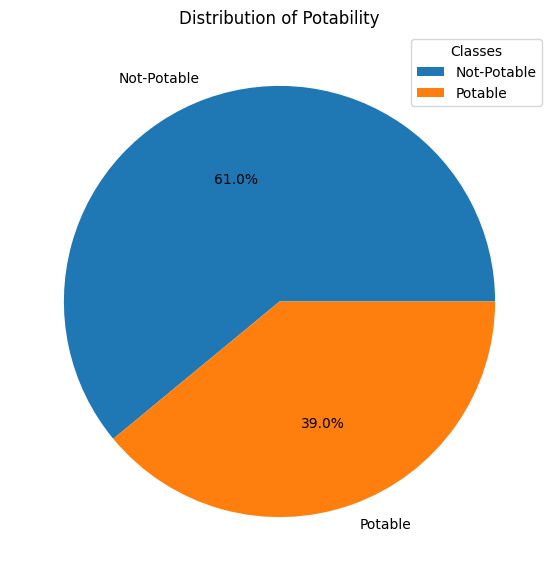

In [31]:
plt.figure(figsize = (7,7))

class_counts = df['Potability'].value_counts().sort_index()

labels = ['Not-Potable', 'Potable']

plt.pie(class_counts, labels = labels, autopct = '%1.1f%%')
plt.title("Distribution of Potability")
plt.legend(labels, title = "Classes")
plt.show()

From the visualization we can understand that data present for not potable water meaning undrinkable water is greater than data present for drinkable water basically potable water.

### Univariate Analysis

In this step of EDA, each quantitative feature was explored separately with histograms, boxplots, and distribution plots to identify the central tendency, shape of distribution, existence of skewness, and potential presence of outliers in the data.

+ Histograms were used to show whether pH, Hardness, and Solids would follow normal or skewed distributions.
+ Boxplots were used to determine features with extremely large or variable values such as Solids and Conductivity.
+ Distribution plots showed smooth KDE curves to make the density patterns of each feature more visible. sible.

This analysis provided insight into what features might need to be transformed-scaled or normalized-and which might greatly influence the model owing to outliers.

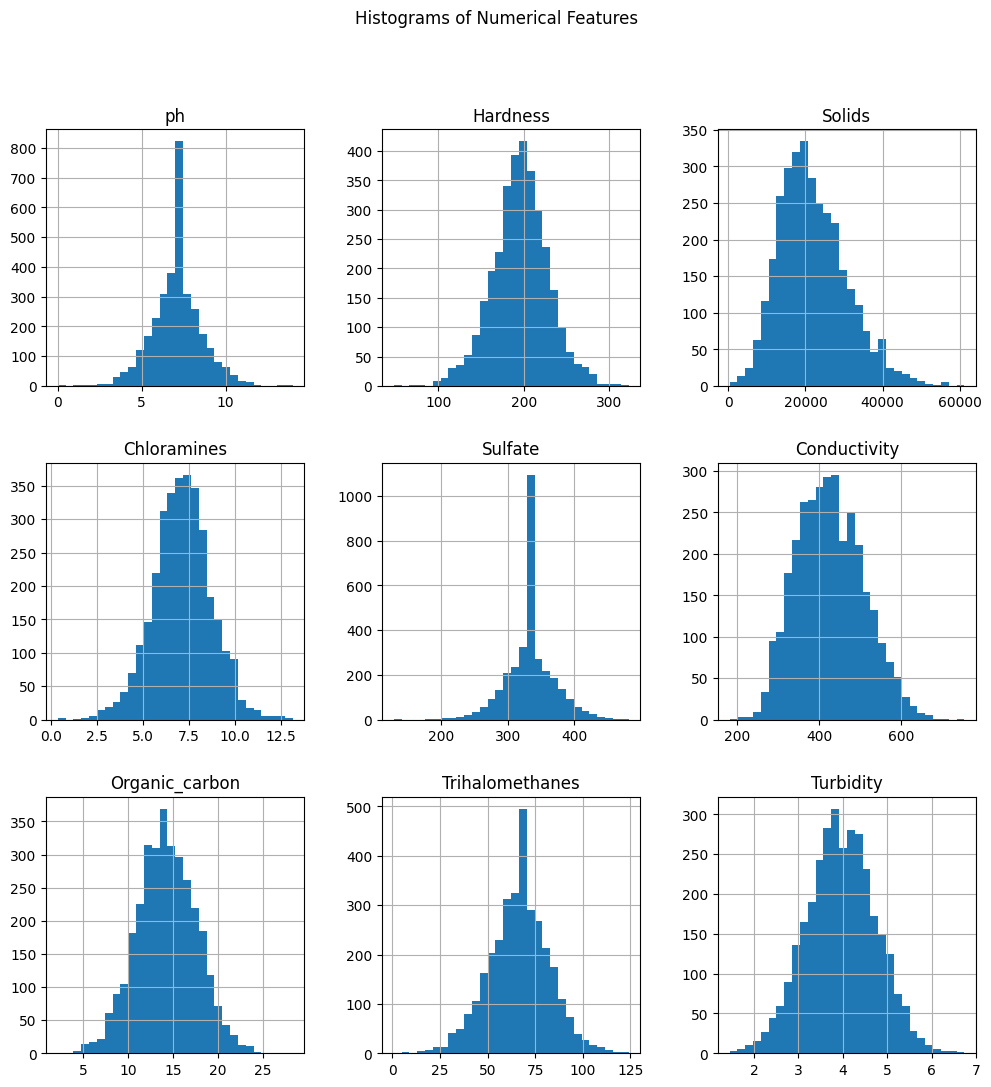

In [32]:
data = df.drop(columns = ['Potability'])

data.hist(figsize = (12,12), bins = 30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Histograms:** Histograms are one of the most useful plots out there. Histograms are basically used to identify the distribution of the data that is present in the data set by making use of bins and calculating the number of data points that belong in that bin, basically the frequency of data. Bins are intervals that are equal in their ranges; we make use of bins because if there are multiple values in a feature or an array/list, it becomes very clustered and not very informative. That is why we make use of bins. Histograms also are used to identify the spread of the data and even, in rare cases, to identify the outliers that are present in the data. In distributions there can be various types of distributions, such as normal, skewed, uniform, etc.

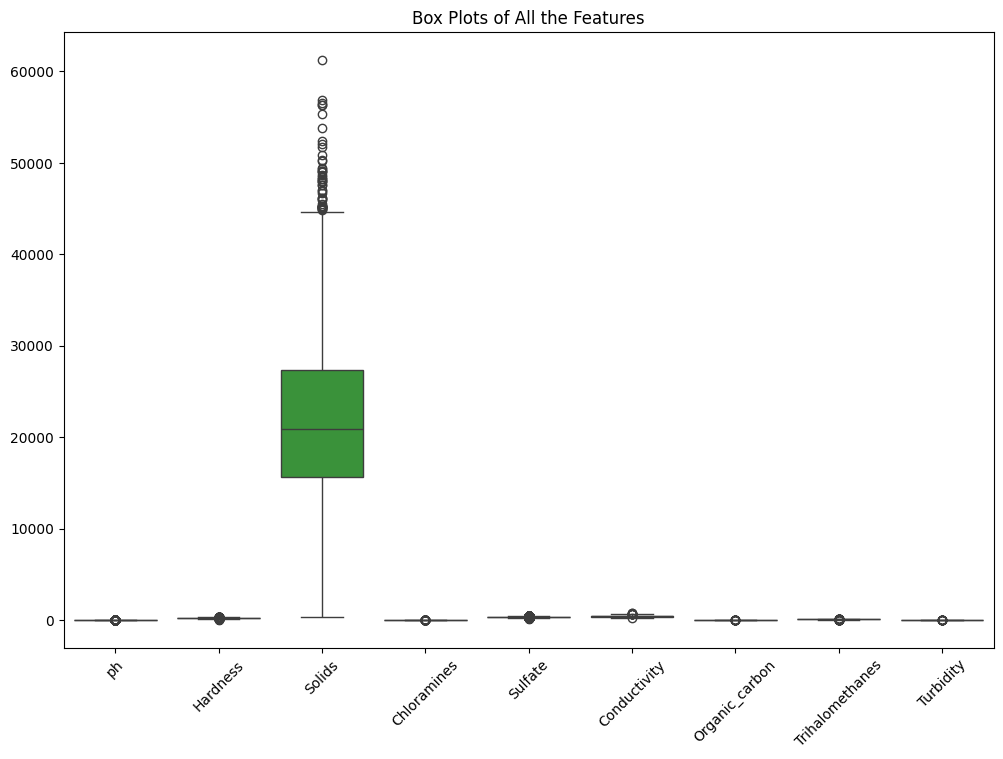

In [33]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data)
plt.xticks(rotation = 45)
plt.title("Box Plots of All the Features")
plt.show()

Here, when we tried to create a boxplot, we noticed that the values in the feature 'Solids' have an enormous scale, which affects how the other features are visualized in the above visualization. The combined visualization of boxplot results in a compressed representation of other features in the dataset. So we then individually visualized every feature in the given dataset.

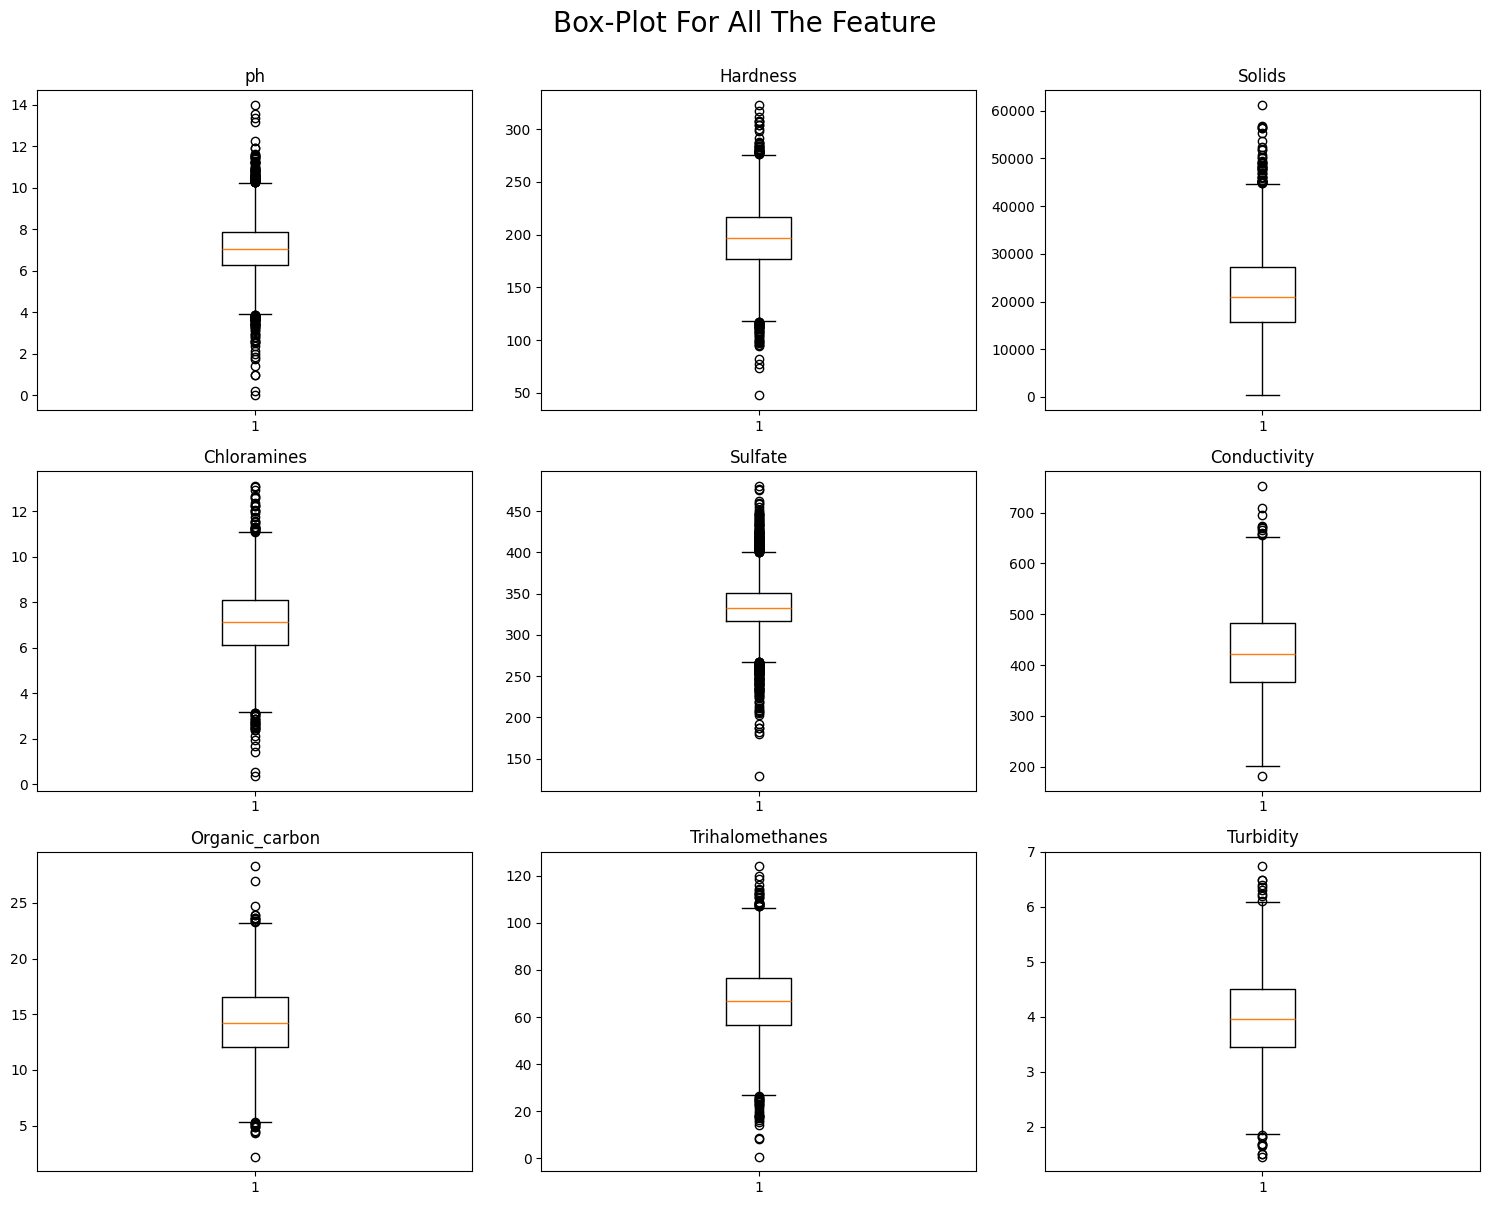

In [34]:
plt.figure(figsize = (15,12))

for i, col in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    plt.boxplot(data[col])
    plt.title(col)

plt.suptitle("Box-Plot For All The Feature", fontsize = 20, y = 1)
plt.tight_layout()
plt.show()


**Box Plot:** Box plots help us to quickly understand various aspects such as spread, center, outliers, and skewness of the data present in the attributes of a dataset. The rectangular box in the middle of the box plot represents 50%, basically the middle of the data, where there are Q1 and Q3 that represent the 25th and 75th percentiles of the IQR (Inter-Quartile Range). The IQR can be measured by `IQR = Q3 - Q1`. The IQR gives us information related to the spread of the data; if the IQR value is higher, then the data is widely spread (high variability); otherwise, the data is tightly packed (low variability). The middle line that is present in the box plot represents the median, or the 50% value of the data. If the median line is closer to Q1, that suggests that the data is right-skewed; if the median line is closer to Q3, that suggests that the data is left-skewed; if the median line is fairly in the middle, then it suggests that the data is fairly symmetric. The end of the whiskers on both sides represents the minimum and the maximum value present in that feature. The length of the whiskers also suggests whether the data in the feature is right-skewed or left-skewed. If the whiskers are longer in the right section, then the data is right-skewed, and if the whiskers in the left are longer, that means that the data is left-skewed. The outliers in a box plot are basically the values that are larger or lower than the maximum and the minimum value.

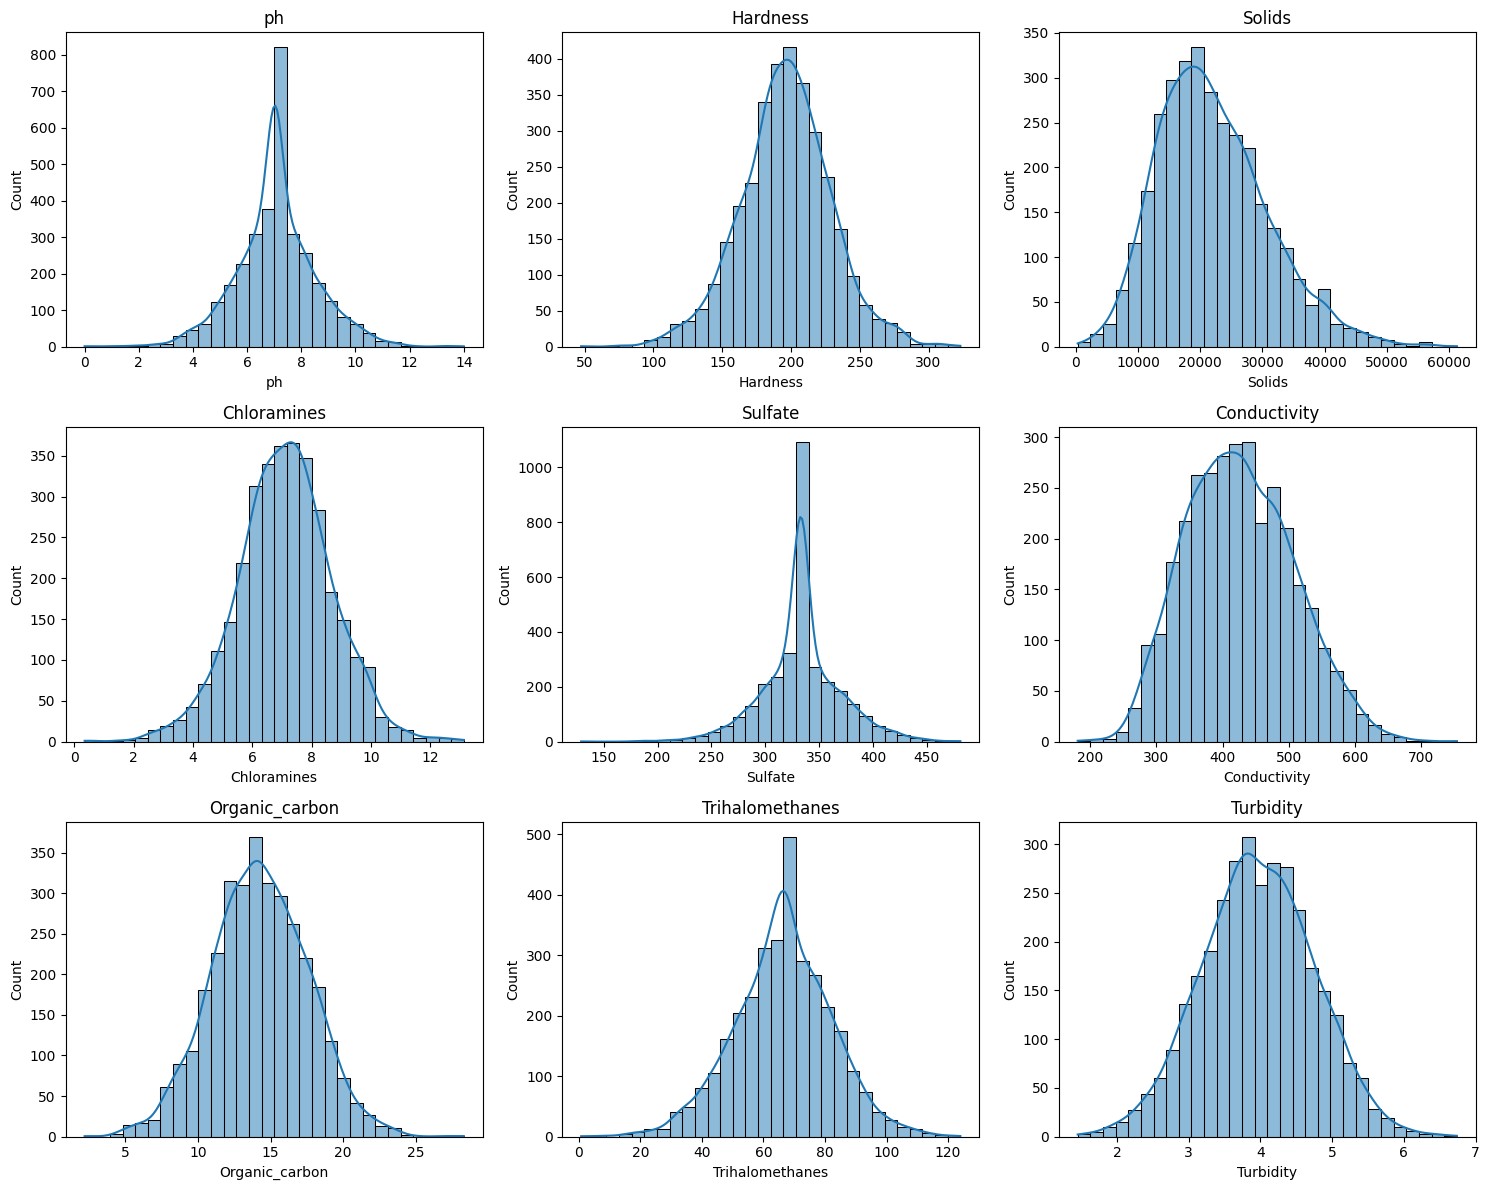

In [35]:
plt.figure(figsize = (15,12))

for i, col in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], kde = True, bins = 30)
    plt.title(col)

plt.tight_layout()
plt.show()

**KDE Plot:** KDE plots are basically histograms but with a line that hepls us to visualize the curve that is being formed by the data from all the attributes in the dataset. This curve basically helps us to visualize the distribustion of the data to identify whether the data is normal, skewed, uniform, binomial, etc.

### Target Based Analysis

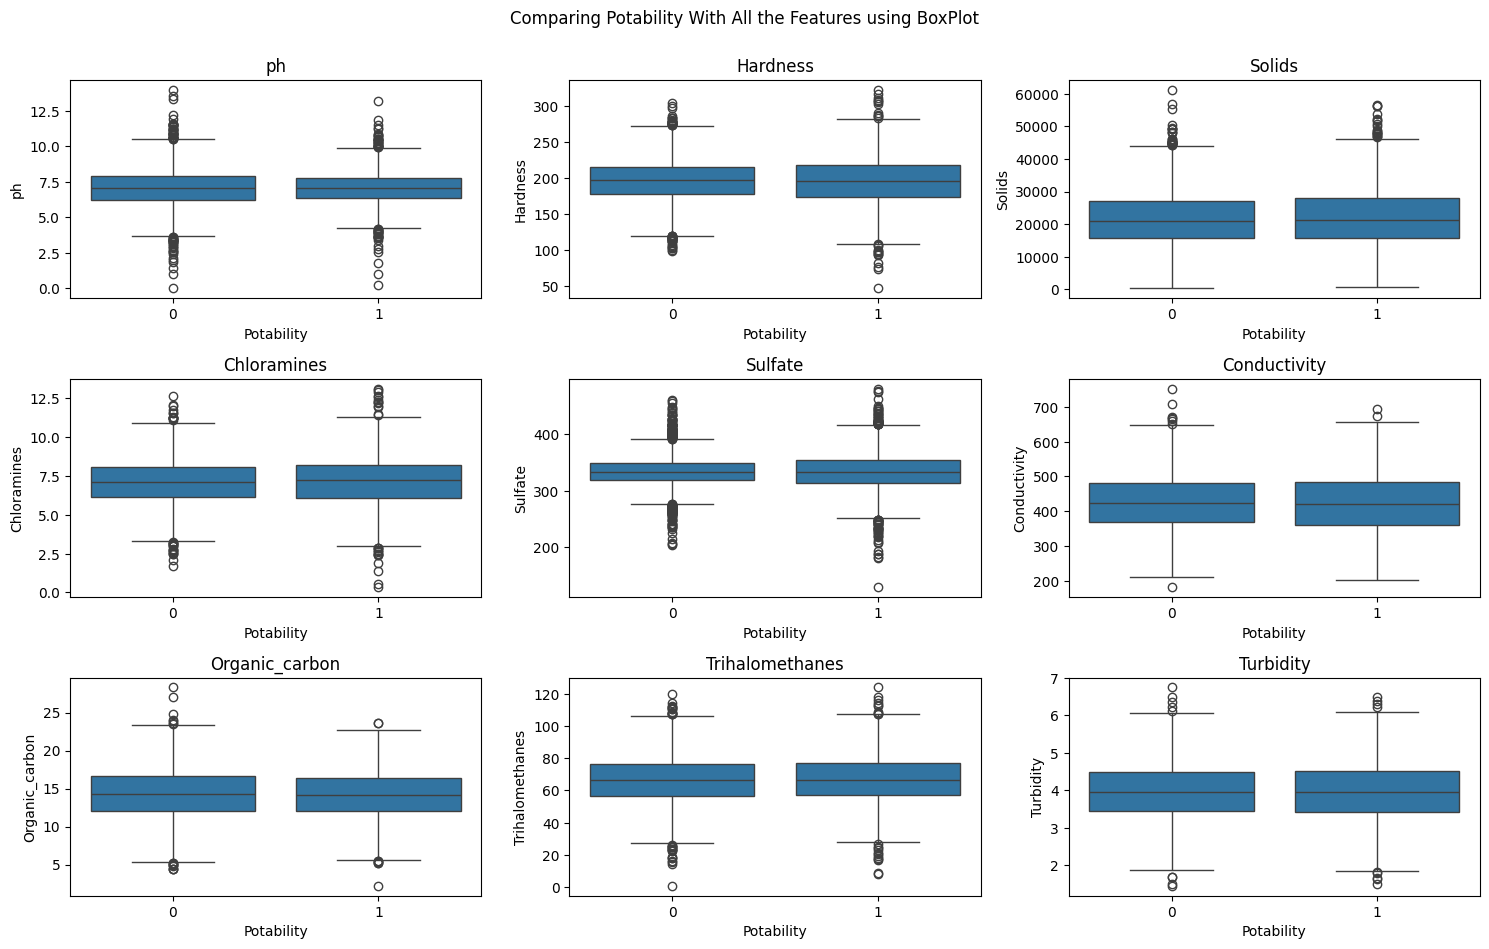

In [36]:
plt.figure(figsize = (15,12))

for i, col in enumerate(data.columns, 1):
    plt.subplot(4,3,i)
    sns.boxplot(data = data, x = df['Potability'], y = col)
    plt.title(col)

plt.suptitle("Comparing Potability With All the Features using BoxPlot", y = 1)
plt.tight_layout()
plt.show()

Here what we did is basically we compared all the features that were present in our dataset and compared them with our target variable, which is the potability of water. We took this step to better understand how every feature in the dataset interacts with the target variable. Here we see that there are a lot of outliers present in the dataset, though most of the data is not skewed.

### Correlation Analysis

In correlation analysis we basically check the correlation of all the features with the target attribute to understand which features are more important than others. This analysis will give us an idea of which features to focus on more and which features will make the most impact while building a predictive model.

In [37]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075760 -0.082004    -0.031741  0.014178   
Hardness         0.075760  1.000000 -0.046899    -0.030054 -0.092833   
Solids          -0.082004 -0.046899  1.000000    -0.070148 -0.149747   
Chloramines     -0.031741 -0.030054 -0.070148     1.000000  0.023762   
Sulfate          0.014178 -0.092833 -0.149747     0.023762  1.000000   
Conductivity     0.017466 -0.023915  0.013831    -0.020486 -0.014182   
Organic_carbon   0.040240  0.003610  0.010242    -0.012653  0.027102   
Trihalomethanes  0.003145 -0.012707 -0.008799     0.016614 -0.025657   
Turbidity       -0.036107 -0.014449  0.019546     0.002363 -0.009767   
Potability      -0.003014 -0.013837  0.033743     0.023779 -0.020476   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017466        0.040240         0.003145  -0.036107   
Hardness            -0.023915        0.003610        -0.012707  -0.014449   
Solids               0.013831        0.010242        -0.008799   0.019546   
Chloramines         -0.020486       -0.012653         0.016614   0.002363   
Sulfate             -0.014182        0.027102        -0.025657  -0.009767   
Conductivity         1.000000        0.020966         0.001184   0.005798   
Organic_carbon       0.020966        1.000000        -0.012958  -0.027308   
Trihalomethanes      0.001184       -0.012958         1.000000  -0.021487   
Turbidity            0.005798       -0.027308        -0.021487   1.000000   
Potability          -0.008128       -0.030001         0.006887   0.001581   

                 Potability  
ph                -0.003014  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020476  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006887  
Turbidity          0.001581  
Potability         1.000000

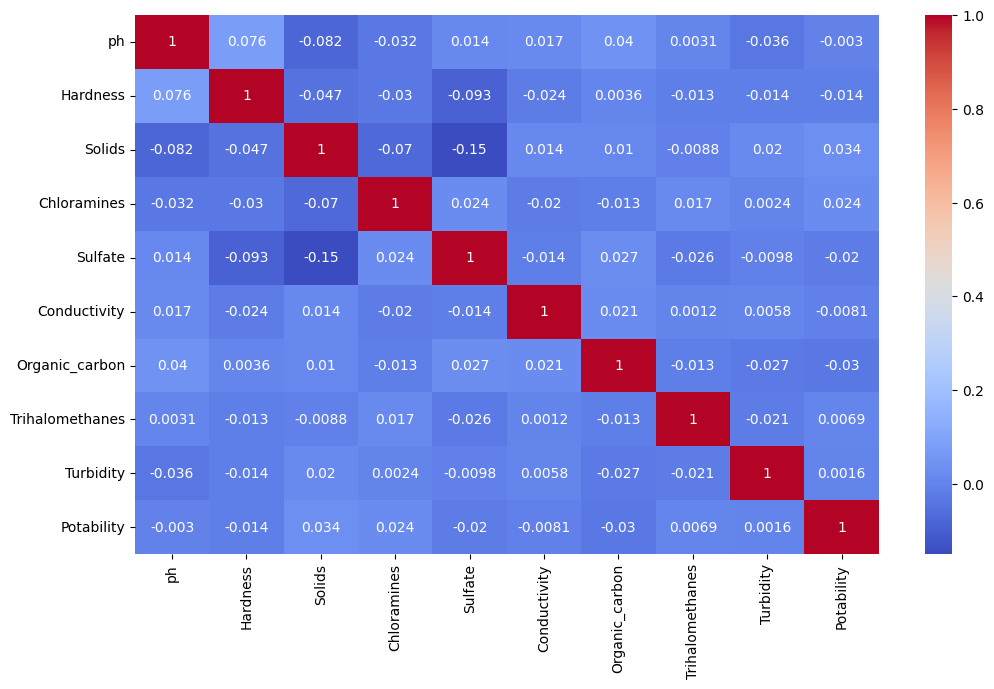

In [38]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot = True ,cmap = 'coolwarm')
plt.show()

Here also is a great example that shows us how visualization makes a difference. When we just used the code df.corr(), we could still see all the numbers, and if we took some efforts, we could have understood what the values in the dataframe were trying to depict, but when we used a heatmap to show the correlation of different features, it became a lot more clear what those values were trying to say. Basically in a heatmap the values that are darker mean that those features have a higher correlation with each other. Over here we can observe that the features apparently do not have a strong correlation with the target attribute that is potability; that was expected because it is not an easy target to predict. There are various features that affect the potability of water, and hence it is a difficult task to predict the potability of water in the environment.

### Pairplots And Scatter Plots

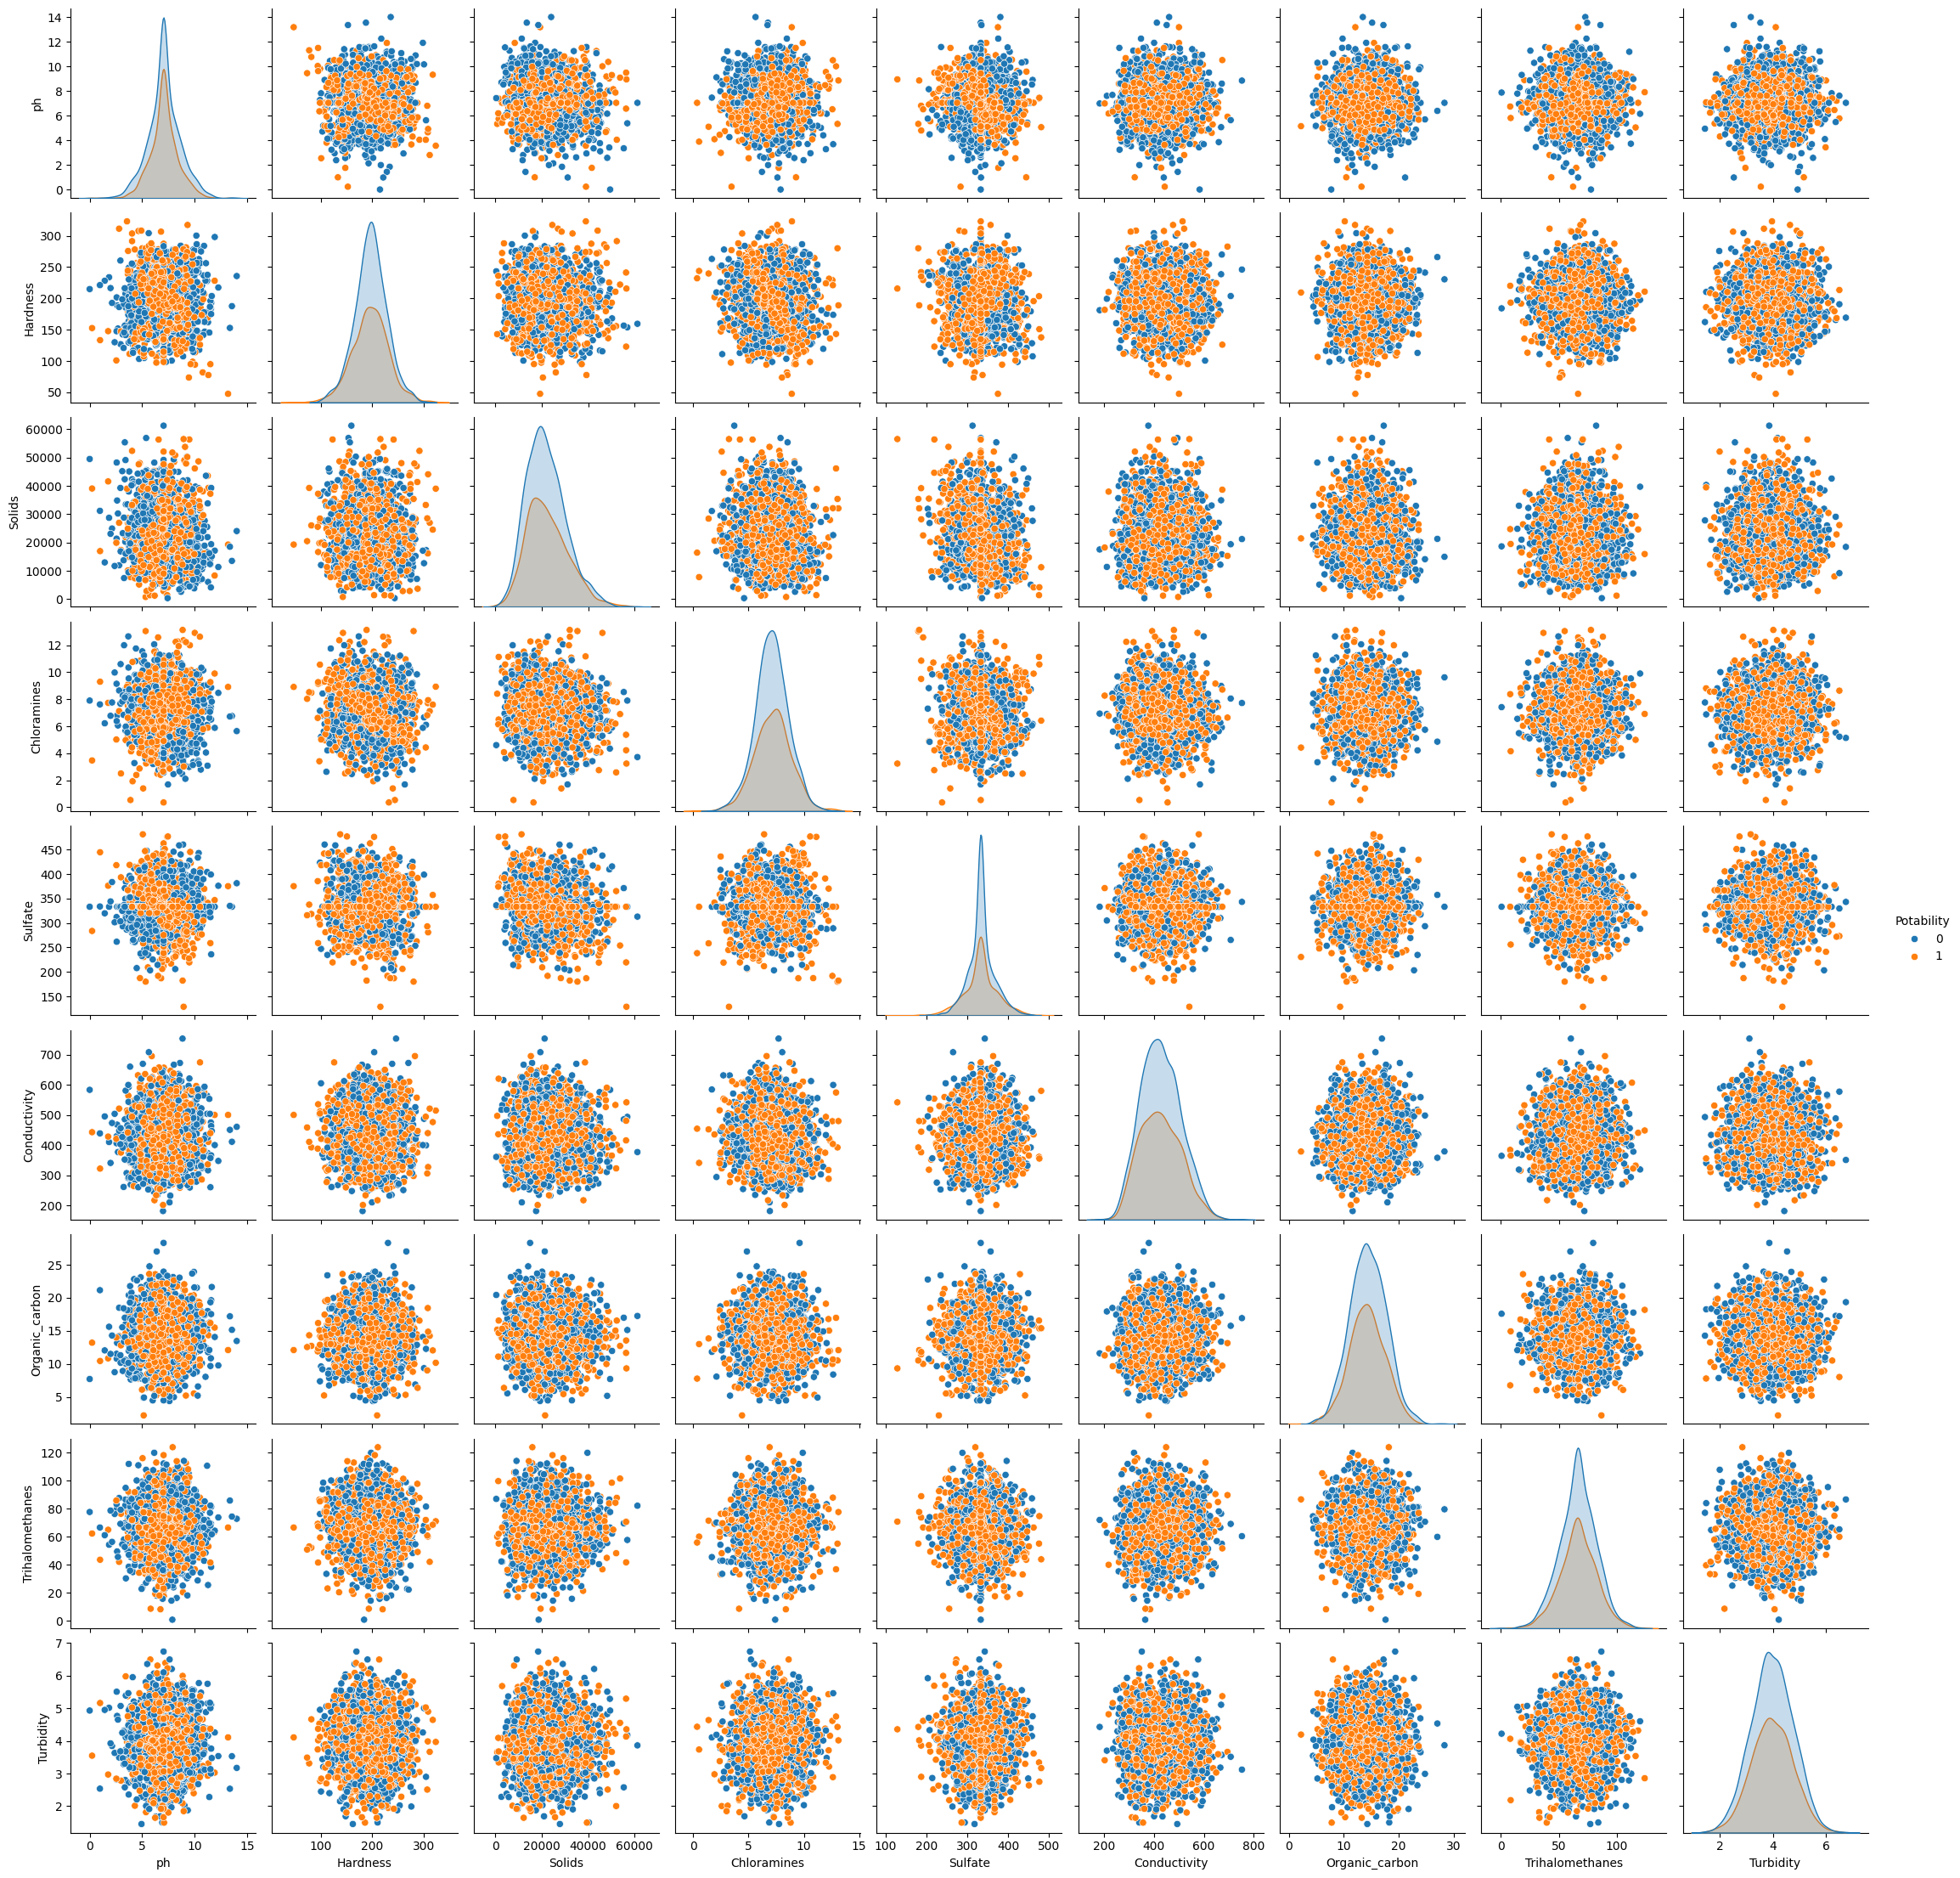

In [39]:
sns.pairplot(df, hue = 'Potability')
plt.show()

The analysis of pairplot shows that the data contains features that are fairly uncorrelated and also there is a strong overlap between potable and non-potable classes. None of the feature pairs are able to visually discriminate between classes, and most of the univariate distributions show heavy overlap in density curves. Therefore, this finally confirms that the water potability classification is a pretty complex nonlinear problem, with weak predictive power of individual features. Hence, tree-based ensemble models (Random Forest, XGBoost) and nonlinear classifiers such as SVM with RBF kernel would be better suited than linear models.